# Calculate $t_{MF}$ for b1555 songs

In [2]:
from starling_rhythm.utils.paths import PROCESSED_DIR
from scipy.io.wavfile import read

In [3]:
bID = 's_b1555_22'

In [4]:
path = PROCESSED_DIR / bID
wav_list = list(path.glob('*.wav'))

In [5]:
len(wav_list)

1041

## Compute over many cores

In [4]:
from joblib import Parallel, delayed
from starling_rhythm.mfdfa import tmf
from tqdm.autonotebook import tqdm
n_jobs = 36
verbose = 0

/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    ts = parallel(
        delayed(tmf)(
            address,
            amp_env_sr = 200
        )
        for address in tqdm(wav_list, desc = 'Calculating over each file')
    )

Calculating over each file:  14%|█▍        | 144/1041 [01:43<13:02,  1.15it/s]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Calculating over each file: 100%|██████████| 1041/1041 [17:46<00:00,  1.02s/it]


## Graph

In [6]:
import pandas as pd

In [7]:
b1555 = pd.DataFrame(
    {
        'file' : wav_list,
        'tmf' : ts
    }
)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<AxesSubplot:ylabel='Density'>

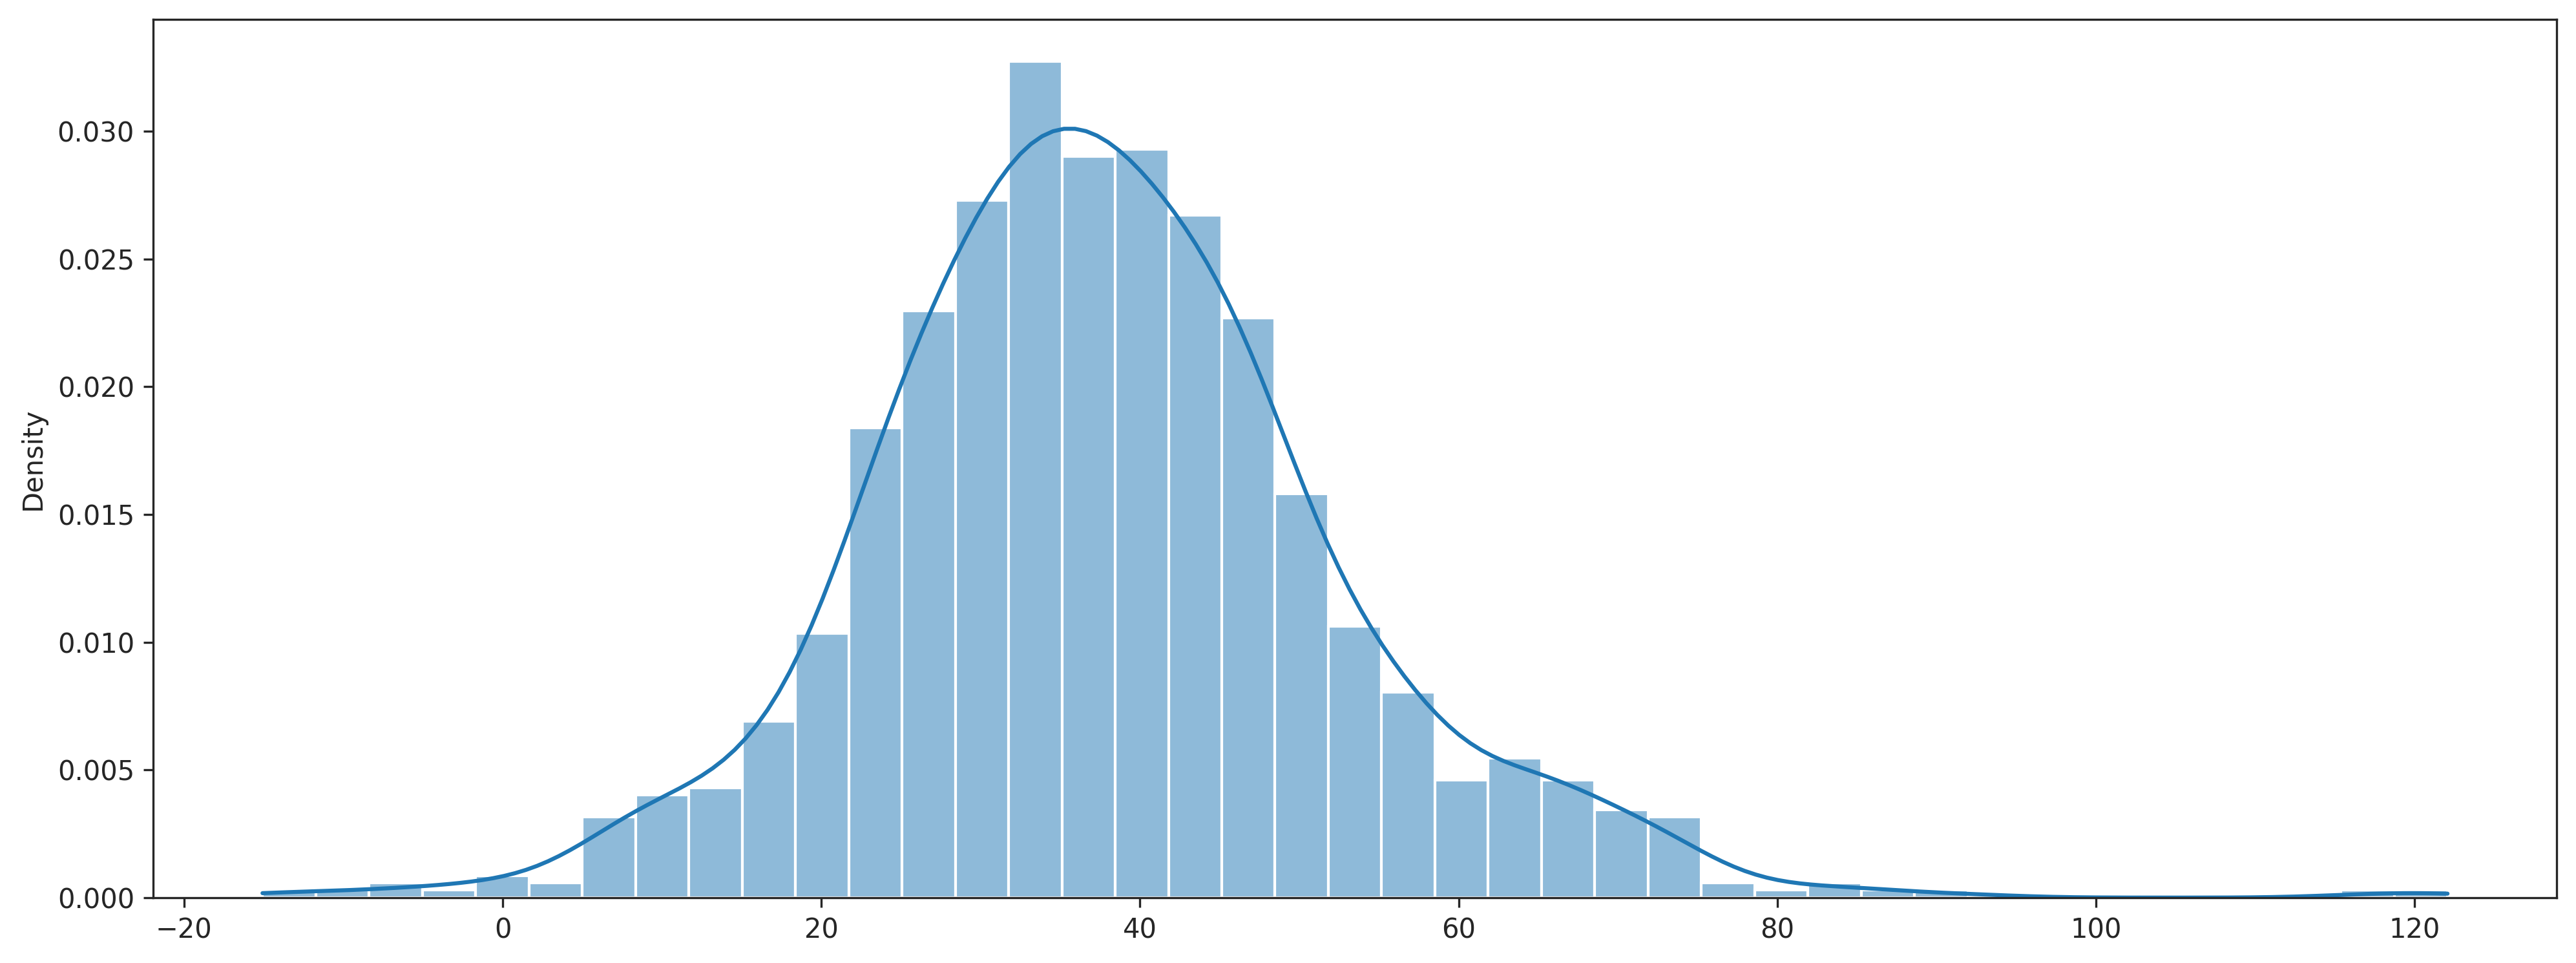

In [9]:
plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

sns.histplot(data = ts, stat = 'density', kde = True)